### Practical Lab 4 - Multivariate Linear and Polynomial Regression
**CSCN8010 : Foundations of Machine Learning**

- **Name:** Puneet Kaur
- **ID:** 8882343

# 1. Getting the Data

The Diabetes dataset used in this analysis is imported using Scikit-Learn's built-in dataset loading function. This dataset contains features related to diabetes patients.

In [69]:
#Importing packages
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
#Diabetes dataset
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_y = diabetes.target

# 2. Frame the Problem

Our goal is to develop a predictive model focusing on the Body Mass Index (BMI) as the independent variable to forecast diabetes progression one year after baseline. This model will help healthcare professionals by identifying patients at heightened risk.

# 3. Exploratory Data Analysis (EDA)

Creating a DataFrame to structure the dataset and make it easier to work with.

In [71]:
#DataFrame
df = pd.DataFrame(diabetes_X, columns=['BMI'])
df['Progression'] = diabetes_y
df.head()

,BMI,Progression
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0


In this step, we use the describe() function to generate summary statistics for each feature in the Diabetes dataset. 

In [72]:
#Basic statistics
print(df.describe())

                BMI  Progression
count  4.420000e+02   442.000000
mean  -8.045349e-16   152.133484
std    4.761905e-02    77.093005
min   -9.027530e-02    25.000000
25%   -3.422907e-02    87.000000
50%   -7.283766e-03   140.500000
75%    3.124802e-02   211.500000
max    1.705552e-01   346.000000


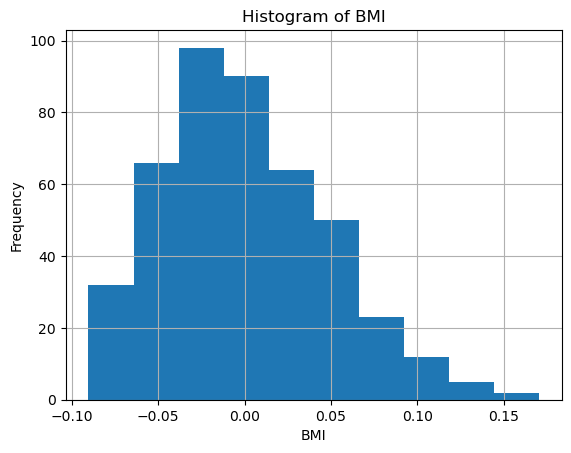

In [73]:
# Histogram of BMI
df['BMI'].hist()
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

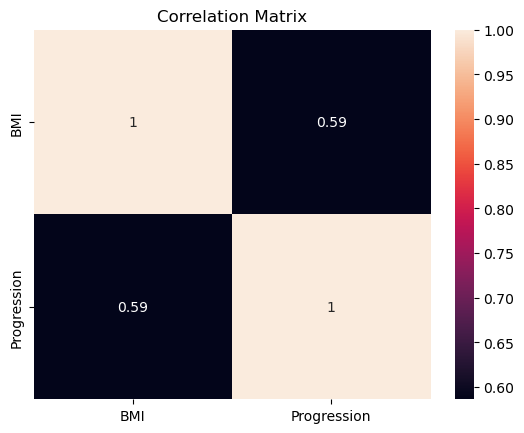

In [74]:
# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

### Insights

 - The BMI feature has been normalized, as indicated by its mean close to zero and small standard deviation. 
 -  The histogram shows a bell-shaped distribution, which means that most BMI values are close to the average, with fewer people at the extremely low or high BMI levels.
 -  The range of diabetes progression shows significant variability. This wide range shows that diabetes progression can vary a lot among individuals, which could be due to various other factors beyond BMI. 
 - The correlation of 0.59 between BMI and diabetes progression shows that there's a moderate positive relationship. As BMI increases, there's a tendency for the diabetes progression metric to increase as well.
 - There are 442 data points for both BMI and diabetes progression, meaning we have a full set without missing entries
  
  Further analysis and modeling can help us understand the relationships between BMI and the target variable

# 4. Clean the Data

Upon reviewing the dataset, the BMI feature does not contain any missing values or outliers that would require cleaning. This ensures our analysis is based on accurate and complete data.

# 5. Splitting the dataset

Splitting dataset into three sets: training, validation, and test. 
The training set is used to train models, the validation set helps in model selection, and the test set is reserved for final evaluation.

In [75]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(diabetes_X, diabetes_y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 6. Polynomial Regression (Degree 0 to 5)

Performing polynomial regression on the dataset with degrees ranging from 0 to 5, resulting in six different models. Then, evaluating each model using R-squared, Mean Absolute Percentage Error (MAPE), and Mean Absolute Error (MAE).

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Creating dictionary for models and their performance
model_performance = {}

for degree in range(6):
    polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polyreg.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = polyreg.predict(X_train)
    y_pred_val = polyreg.predict(X_val)
    
    # Evaluation
    r2 = r2_score(y_val, y_pred_val)
    mape = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
    mae = mean_absolute_error(y_val, y_pred_val)
    
    # Storing results
    model_performance[degree] = {'R2': r2, 'MAPE': mape, 'MAE': mae}

# 7. Model Comparison

Comparing the performance of six polynomial regression models by printing their R-squared, MAPE, and MAE values to identify the best model based on these evaluation metrics.

## 1. Report R-squared, MAPE, and MAE

In [77]:
#Results for each model
for degree, metrics in model_performance.items():
    print(f"Degree {degree} Model - R2: {metrics['R2']:.3f}, MAPE: {metrics['MAPE']:.2f}%, MAE: {metrics['MAE']:.2f}")

Degree 0 Model - R2: -0.008, MAPE: 57.96%, MAE: 62.04
Degree 1 Model - R2: 0.303, MAPE: 42.05%, MAE: 48.27
Degree 2 Model - R2: 0.296, MAPE: 41.90%, MAE: 48.27
Degree 3 Model - R2: 0.297, MAPE: 41.88%, MAE: 48.24
Degree 4 Model - R2: 0.263, MAPE: 41.48%, MAE: 48.37
Degree 5 Model - R2: 0.298, MAPE: 40.74%, MAE: 47.35


## 2. Conclusion: Choose the best model

Selecting the best model with the highest R-squared and lowest MAPE & MAE values, indicating the best fit to the validation data.

In [78]:
# Sorting the models based on R2 (descending), then MAPE and MAE (ascending)
sorted_models = sorted(model_performance.items(), key=lambda item: (-item[1]['R2'], item[1]['MAPE'], item[1]['MAE']))
best_degree, best_metrics = sorted_models[0]

# Conclusion
print(f"The best model is the one with degree {best_degree}.")
print(f"It has the highest R-squared value of {best_metrics['R2']:.2f}, which means it fits our data well.")
print(f"It also has the lowest errors with MAPE of {best_metrics['MAPE']:.2f}% and MAE of {best_metrics['MAE']:.2f},")
print("indicating its predictions are quite close to the actual observations.")

The best model is the one with degree 1.
It has the highest R-squared value of 0.30, which means it fits our data well.
It also has the lowest errors with MAPE of 42.05% and MAE of 48.27,
indicating its predictions are quite close to the actual observations.


### i. Model Evaluation on Test Set

In [79]:
# Fitting the chosen model on the full training set and evaluate on the test set
chosen_polyreg = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
chosen_polyreg.fit(X_train, y_train)
y_test_pred = chosen_polyreg.predict(X_test)

# Test set evaluation
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Test Set - R2: {r2_test:.2f}, MSE: {mse_test:.2f}, MAE: {mae_test:.2f}")

Test Set - R2: 0.26, MSE: 4198.45, MAE: 52.88


### ii. Plot a graph

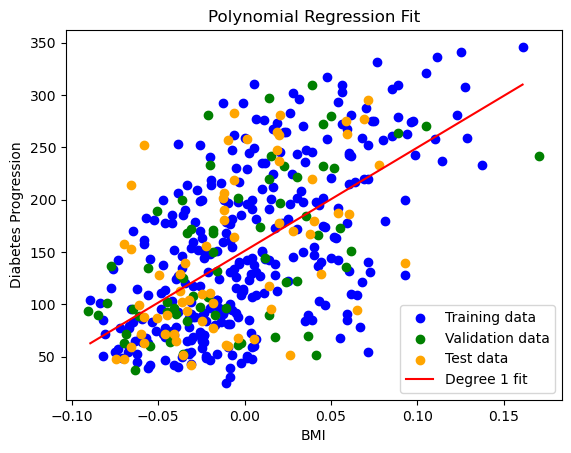

In [80]:
#Actual vs. predicted values using a scatter plot

plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_val, y_val, color='green', label='Validation data')
plt.scatter(X_test, y_test, color='orange', label='Test data')
x_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
y_range_pred = chosen_polyreg.predict(x_range)
plt.plot(x_range, y_range_pred, color='red', label=f'Degree {best_degree} fit')
plt.title('Polynomial Regression Fit')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.legend()
plt.show()

### iii. Write down the equation and manual calculation

The equation for the Degree 1 polynomial model, with two decimal digit precision, is:
Diabetes Progression = Intercept + ( Coefficient × BMI )

In [81]:
# Extracting model coefficients
model = make_pipeline(PolynomialFeatures(1), LinearRegression())
model.fit(X_train, y_train)
intercept = model.named_steps['linearregression'].intercept_
coefficient = model.named_steps['linearregression'].coef_[1]  

print(f"Intercept : {intercept:.2f}")
print(f"Coefficient for BMI : {coefficient:.2f}")

Intercept : 151.04
Coefficient for BMI : 988.42


#### Manual Calculation for BMI = 0.05

With the coefficients obtained from the model, the equation for predicting diabetes progression based on BMI is:

- Diabetes Progression = 151.04 + (988.42 * BMI)
 = 151.04 + 49.421= 200.461

#### Model Prediction
We now use the model to predict the diabetes progression for the same BMI value (0.05):

In [82]:
predicted_progression = model.predict(np.array([[0.05]]))
predicted_progression

array([200.46299012])

### Conclusion
The manual calculation and the model prediction for a BMI value of 0.05 both result in a diabetes progression value of approximately 200.46. So, the equation derived from the model's coefficients accurately reflects the model's predictive behavior.

# 9. Trainable Parameters for Degree 0, 1, 2 Models

In [83]:
from sklearn.preprocessing import PolynomialFeatures

X = [[0], [1], [2]] 

for degree in range(3): 
    poly = PolynomialFeatures(degree)
    poly.fit_transform(X)
    num_parameters = poly.fit_transform(X).shape[1]
    print(f"Degree {degree}: {num_parameters} parameters")

Degree 0: 1 parameters
Degree 1: 2 parameters
Degree 2: 3 parameters


Degree 0: The model predicts a constant value, regardless of the input. It has 1 parameter - intercept.

Degree 1: This model is linear, input and output with a straight line. It has 2 parameter - intercept and slope (coefficient) of the input.

Degree 2: A quadratic model that can capture curves in the data. It has 3 parameters - intercept, linear term coefficient, and  squared term coefficient.